In [7]:
import pandas as pd

with open('../data/One.txt') as txt:
    words_one = txt.read().lower().split()
    unique_one = set(words_one)

In [10]:
with open('../data/Two.txt') as txt:
    words_two = txt.read().lower().split()
    unique_two = set(words_two)

In [8]:
unique_one

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'dogs',
 'furry',
 'is',
 'our',
 'pets',
 'story',
 'this'}

In [11]:
all_words = set()

In [12]:
all_words.update(unique_one)

In [13]:
all_words.update(unique_two)

In [14]:
all_words

{'a',
 'about',
 'animals',
 'are',
 'canine',
 'catching',
 'dogs',
 'fun',
 'furry',
 'is',
 'our',
 'pets',
 'popular',
 'sport',
 'story',
 'surfing',
 'this',
 'water',
 'waves'}

In [15]:
full_vocab = dict()
i = 0

for word in all_words:
    full_vocab[word] = i
    i+=1

In [16]:
full_vocab

{'waves': 0,
 'a': 1,
 'dogs': 2,
 'our': 3,
 'about': 4,
 'are': 5,
 'animals': 6,
 'this': 7,
 'sport': 8,
 'catching': 9,
 'is': 10,
 'surfing': 11,
 'water': 12,
 'fun': 13,
 'canine': 14,
 'popular': 15,
 'story': 16,
 'pets': 17,
 'furry': 18}

In [17]:
one_freq = [0]* len(full_vocab)
two_freq = [0]* len(full_vocab)
all_words = ['']* len(full_vocab)

In [18]:
two_freq

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [19]:
with open('../data/One.txt') as f:
    one_text = f.read().lower().split()

In [20]:
for word in one_text:
    word_ind = full_vocab[word]
    one_freq[word_ind] +=1

In [21]:
one_freq

[0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1]

In [22]:
with open('../data/Two.txt') as f:
    two_text = f.read().lower().split()

In [23]:
two_text

['this',
 'story',
 'is',
 'about',
 'surfing',
 'catching',
 'waves',
 'is',
 'fun',
 'surfing',
 'is',
 'a',
 'popular',
 'water',
 'sport']

In [24]:
for word in two_text:
    word_ind = full_vocab[word]
    two_freq[word_ind] +=1

In [25]:
for word in full_vocab:
    word_ind = full_vocab[word]
    all_words[word_ind] = word

In [26]:
all_words

['waves',
 'a',
 'dogs',
 'our',
 'about',
 'are',
 'animals',
 'this',
 'sport',
 'catching',
 'is',
 'surfing',
 'water',
 'fun',
 'canine',
 'popular',
 'story',
 'pets',
 'furry']

In [27]:
import pandas as pd

In [28]:
bow = pd.DataFrame(data=[one_freq,two_freq], columns=all_words)

In [29]:
bow

,waves,a,dogs,our,about,are,animals,this,sport,catching,is,surfing,water,fun,canine,popular,story,pets,furry
0,0,1,2,1,1,1,1,1,0,0,1,0,0,0,1,0,1,1,1
1,1,1,0,0,1,0,0,1,1,1,3,2,1,1,0,1,1,0,0


In [30]:
###################################################

In [31]:
text = ['this is some line ', 'another line is this', 'third line dasdad']

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [48]:
cv = CountVectorizer()

In [49]:
sparse_matrix = cv.fit_transform(text)

In [50]:
sparse_matrix.todense()

matrix([[0, 0, 1, 1, 1, 0, 1],
        [1, 0, 1, 1, 0, 0, 1],
        [0, 1, 0, 1, 0, 1, 0]], dtype=int64)

In [51]:
cv.vocabulary_

{'this': 6,
 'is': 2,
 'some': 4,
 'line': 3,
 'another': 0,
 'third': 5,
 'dasdad': 1}

In [52]:
tfidf = TfidfTransformer()

In [53]:
sparse_matrix

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [54]:
results = tfidf.fit_transform(sparse_matrix)

In [56]:
results.todense()

matrix([[0.        , 0.        , 0.4804584 , 0.37311881, 0.63174505,
         0.        , 0.4804584 ],
        [0.63174505, 0.        , 0.4804584 , 0.37311881, 0.        ,
         0.        , 0.4804584 ],
        [0.        , 0.65249088, 0.        , 0.38537163, 0.        ,
         0.65249088, 0.        ]])

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tv = TfidfVectorizer()

In [60]:
tv_result = tv.fit_transform(text)

In [61]:
tv_result.todense()

matrix([[0.        , 0.        , 0.4804584 , 0.37311881, 0.63174505,
         0.        , 0.4804584 ],
        [0.63174505, 0.        , 0.4804584 , 0.37311881, 0.        ,
         0.        , 0.4804584 ],
        [0.        , 0.65249088, 0.        , 0.38537163, 0.        ,
         0.65249088, 0.        ]])

In [62]:
########################################

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('../data/airline_tweets.csv')

In [66]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

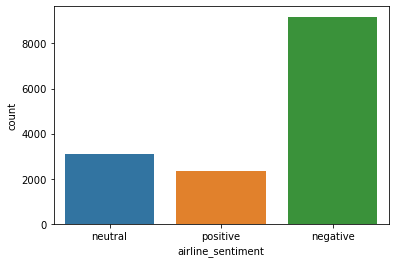

In [67]:
sns.countplot(data = df , x ='airline_sentiment')

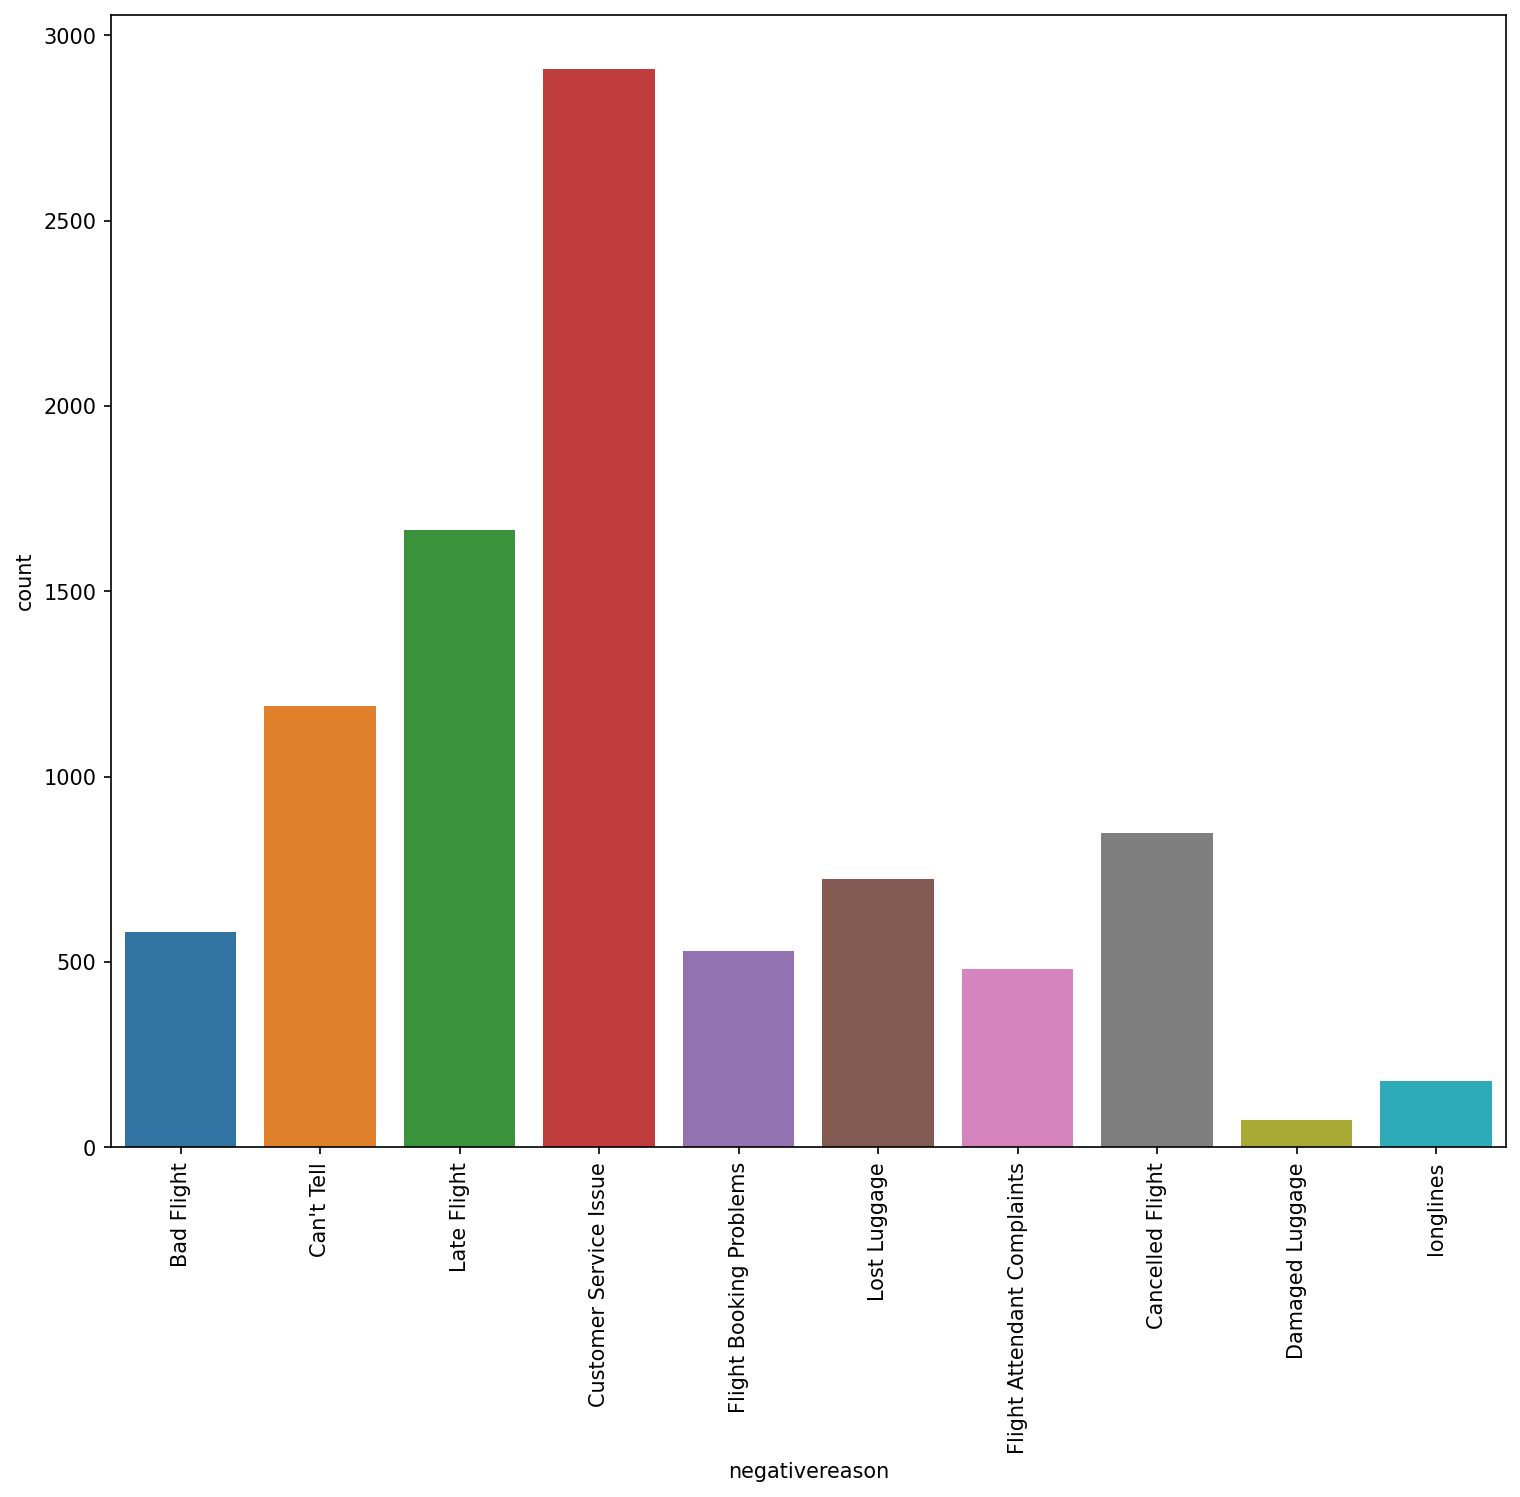

In [70]:
plt.figure(figsize=(12,10), dpi=150)
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='airline', ylabel='count'>

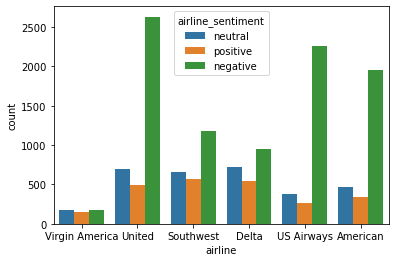

In [71]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')

In [72]:
data = df[['airline_sentiment', 'text']]

In [73]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [74]:
X = data['text']

In [75]:
y = data['airline_sentiment']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [78]:
tfidf = TfidfVectorizer(stop_words='english')

In [79]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [80]:
X_train_tdidf = tfidf.transform(X_train)

In [81]:
X_test_tdidf = tfidf.transform(X_test)

In [82]:
X_train_tdidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

In [83]:
from sklearn.naive_bayes import MultinomialNB

In [84]:
nb = MultinomialNB()

In [85]:
nb.fit(X_train_tdidf,y_train)

MultinomialNB()

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tdidf, y_train)

LogisticRegression(max_iter=1000)

In [88]:
from sklearn.svm import SVC,LinearSVC

In [89]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tdidf,y_train)

SVC()

In [90]:
linear_svc = LinearSVC()

In [91]:
linear_svc.fit(X_train_tdidf,y_train)

LinearSVC()

In [92]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [93]:
def report(model):
    preds = model.predict(X_test_tdidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tdidf,y_test)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



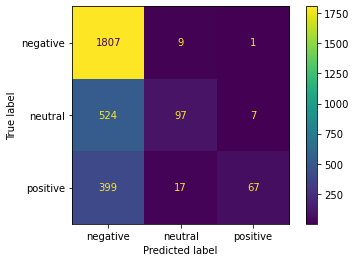

In [94]:
report(nb)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



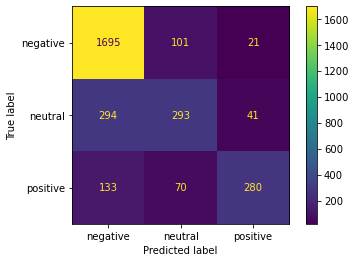

In [95]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



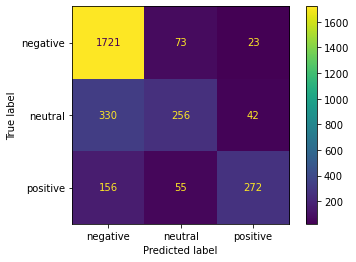

In [96]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



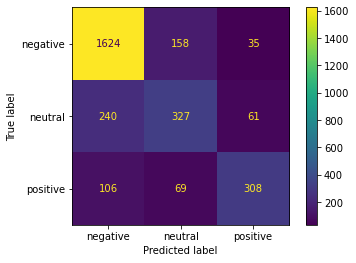

In [97]:
report(linear_svc)

In [99]:
from sklearn.pipeline import Pipeline

In [100]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('svc',LinearSVC())])

In [101]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [103]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [104]:
pipe.predict(['the worst flight ever'])

array(['negative'], dtype=object)